In [13]:
import numpy  as np
import matplotlib.pyplot as plt
import scipy as scp

print("hello")

hello


In [8]:
def H_ssh(k, t1, t2):
    """
    SSH Bloch Hamiltonian
    """
    offdiag = t1 + t2 * np.exp(-1j * k)
    H = np.array([[0, offdiag],
                  [np.conjugate(offdiag), 0]], dtype=complex)
    return H

In [9]:
def band_structure(t1, t2, Nk=400):
    k_list = np.linspace(-np.pi, np.pi, Nk)
    energies = np.zeros((Nk, 2))

    for i, k in enumerate(k_list):
        E, _ = np.linalg.eigh(H_ssh(k, t1, t2))
        energies[i] = E

    plt.plot(k_list, energies[:, 0], 'k')
    plt.plot(k_list, energies[:, 1], 'k')
    plt.xlabel(r"$k$")
    plt.ylabel("Energy")
    plt.title(f"SSH band structure: t1={t1}, t2={t2}")
    plt.show()


In [10]:
def band_structure(t1, t2, Nk=400):
    k_list = np.linspace(-np.pi, np.pi, Nk)
    energies = np.zeros((Nk, 2))

    for i, k in enumerate(k_list):
        E, _ = np.linalg.eigh(H_ssh(k, t1, t2))
        energies[i] = E

    plt.plot(k_list, energies[:, 0], 'k')
    plt.plot(k_list, energies[:, 1], 'k')
    plt.xlabel(r"$k$")
    plt.ylabel("Energy")
    plt.title(f"SSH band structure: t1={t1}, t2={t2}")
    plt.show()


In [11]:
def band_structure(t1, t2, Nk=400):
    k_list = np.linspace(-np.pi, np.pi, Nk)
    energies = np.zeros((Nk, 2))

    for i, k in enumerate(k_list):
        E, _ = np.linalg.eigh(H_ssh(k, t1, t2))
        energies[i] = E

    plt.plot(k_list, energies[:, 0], 'k')
    plt.plot(k_list, energies[:, 1], 'k')
    plt.xlabel(r"$k$")
    plt.ylabel("Energy")
    plt.title(f"SSH band structure: t1={t1}, t2={t2}")
    plt.show()

In [20]:
def occupied_state(k, t1, t2):
    E, U = np.linalg.eigh(H_ssh(k, t1, t2))
    return U[:, 0]  # lowest energy state


In [14]:
def zak_phase(t1, t2, Nk=400):
    k_list = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
    phase = 0.0

    for i in range(Nk):
        k = k_list[i]
        k_next = k_list[(i+1) % Nk]

        u_k = occupied_state(k, t1, t2)
        u_kp = occupied_state(k_next, t1, t2)

        overlap = np.vdot(u_k, u_kp)
        phase += np.angle(overlap)

    return phase % (2 * np.pi)
    

In [15]:
def ssh_real_space(t1, t2, N):
    dim = 2 * N
    H = np.zeros((dim, dim))

    for i in range(N):
        H[2*i, 2*i+1] = t1
        H[2*i+1, 2*i] = t1

        if i < N - 1:
            H[2*i+1, 2*(i+1)] = t2
            H[2*(i+1), 2*i+1] = t2

    return H


In [17]:
def edge_spectrum(t1, t2, N=40):
    H = ssh_real_space(t1, t2, N)
    E = np.linalg.eigvalsh(H)

    plt.plot(E, 'o')
    plt.axhline(0, color='r', linestyle='--')
    plt.ylabel("Energy")
    plt.title("SSH open boundary spectrum")
    plt.show()


In [22]:
t1 = 2.0
t2 = 1.0   # change to t2 < t1 for trivial phase

gamma = zak_phase(t1, t2)
print("Zak phase =", gamma / np.pi, "π")


Zak phase = 6.239629843843358e-17 π


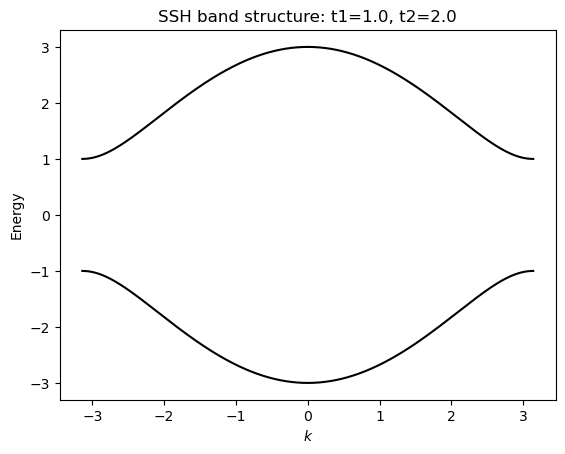

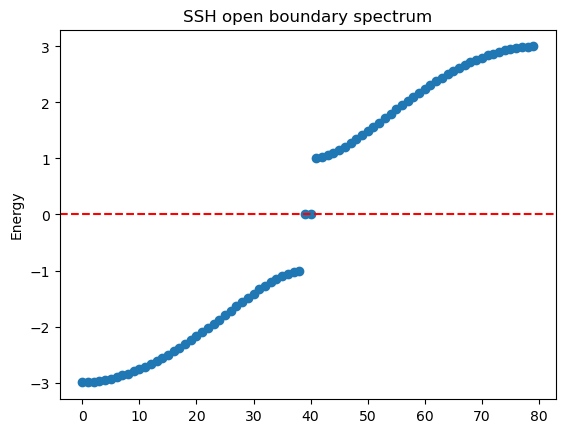

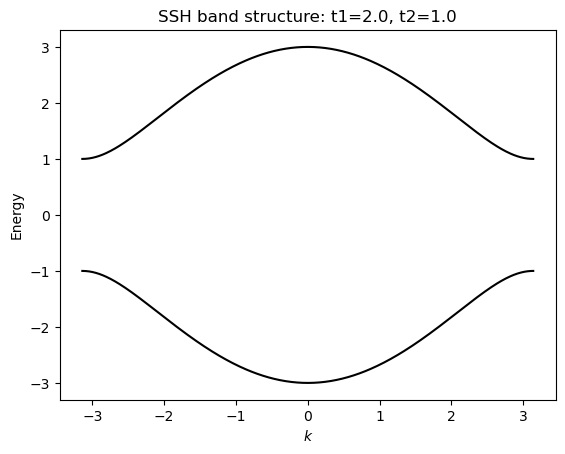

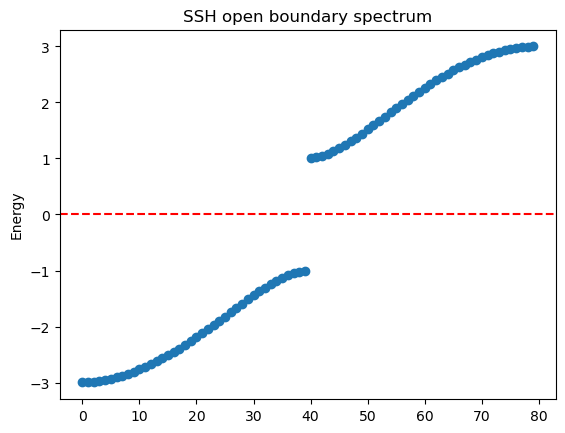

In [24]:
band_structure(t1=1.0, t2=2.0)
edge_spectrum(t1=1.0, t2=2.0)


band_structure(t1=2.0, t2=1.0)
edge_spectrum(t1=2.0, t2=1.0)
